In [1]:
import os
import pandas as pd
os.getcwd()

'C:\\Users\\may7e\\Documents\\GitHub\\Kaggle\\Kaggle\\NLP'

In [2]:
#import the training and testing dataset
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

In [4]:
#take a look at the training data
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [5]:
target = train['target']

<Axes: xlabel='target', ylabel='Count'>

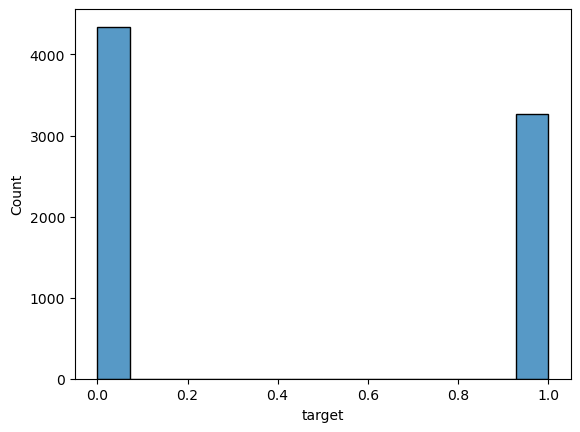

In [6]:
import seaborn as sns

#look at the target data distribution

sns.histplot(target)

In [7]:
#get the percent of each class
target.value_counts(normalize = True)*100

0    57.034021
1    42.965979
Name: target, dtype: float64

In [8]:
#clean the data of NAN values. 
#Replace the Nan with a default string ('Unknown')
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Tokenization function
def tokenize_text(text):
    '''
    tokenize the text
    '''
    tokens = word_tokenize(text)
    return tokens

# Normalization function
def normalize_tokens(tokens):
    '''
    Normalize the text by lowering the characters
    '''
    normalized_tokens = [token.lower() for token in tokens]
    return normalized_tokens

# Stopword removal function
def remove_stopwords(tokens):
    '''
    Flip through the text and remove enlgish language stopwords
    '''
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens

# Stemming function
def stem_tokens(tokens):
    porter = PorterStemmer()
    stemmed_tokens = [porter.stem(token) for token in tokens]
    return stemmed_tokens


#put it all in a function and apply to the data.
def PreProcess(data):
    '''
    Perform a basic cleaning and processing of the data and lexical analysis
    
    Parameters:
    ----------
    Data: pd.DataFrame
        DataFrame of the text strings without the target data. 
   
    Returns:
    --------
    data: pd.DataFrame
        Df of the columns having gone through several preprocessing steps.
    '''
    data.fillna('Unknown', inplace = True) #fill nans
    
    #apply the lexical Analysis
    for col in data.columns:
        # Tokenization
        data[f'{col}_tokens'] = data[col].apply(tokenize_text)

        # Normalization
        data[f'{col}_normalized_tokens'] = data[f'{col}_tokens'].apply(normalize_tokens)

        # Stopword removal
        data[f'{col}_filtered_tokens'] = data[f'{col}_normalized_tokens'].apply(remove_stopwords)

        # Stemming
        data[f'{col}_stemmed_tokens'] = data[f'{col}_filtered_tokens'].apply(stem_tokens)
    
    #select only the stemmed columns as that was the last step in the processing of the data.
    data = data.filter(regex = 'stemmed', axis = 1)
    return data
    


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\may7e\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\may7e\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
target

0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: int64

In [10]:
#clean the train data for preprocessing

train = train.drop(columns = ['id', 'target'])

In [11]:
train

,keyword,location,text
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...
1,NaN,NaN,Forest fire near La Ronge Sask. Canada
2,NaN,NaN,All residents asked to 'shelter in place' are ...
3,NaN,NaN,"13,000 people receive #wildfires evacuation or..."
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...
...,...,...,...
7608,NaN,NaN,Two giant cranes holding a bridge collapse int...
7609,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...
7610,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611,NaN,NaN,Police investigating after an e-bike collided ...


In [12]:
train.isna().sum()

keyword       61
location    2533
text           0
dtype: int64

In [13]:
#process the data using the function defined above. 
proccessed = PreProcess(train)

In [14]:
proccessed

,keyword_stemmed_tokens,location_stemmed_tokens,text_stemmed_tokens
0,[unknown],[unknown],"[deed, reason, #, earthquak, may, allah, forgi..."
1,[unknown],[unknown],"[forest, fire, near, la, rong, sask, ., canada]"
2,[unknown],[unknown],"[resid, ask, 'shelter, place, ', notifi, offic..."
3,[unknown],[unknown],"[13,000, peopl, receiv, #, wildfir, evacu, ord..."
4,[unknown],[unknown],"[got, sent, photo, rubi, #, alaska, smoke, #, ..."
...,...,...,...
7608,[unknown],[unknown],"[two, giant, crane, hold, bridg, collaps, near..."
7609,[unknown],[unknown],"[@, aria_ahrari, @, thetawniest, control, wild..."
7610,[unknown],[unknown],"[m1.94, [, 01:04, utc, ], ?, 5km, volcano, haw..."
7611,[unknown],[unknown],"[polic, investig, e-bik, collid, car, littl, p..."


In [15]:
#embed the words 
from gensim.models import Word2Vec

In [16]:
all_col = proccessed['keyword_stemmed_tokens'] + proccessed['location_stemmed_tokens'] + proccessed['text_stemmed_tokens']

In [17]:
all_col

0       [unknown, unknown, deed, reason, #, earthquak,...
1       [unknown, unknown, forest, fire, near, la, ron...
2       [unknown, unknown, resid, ask, 'shelter, place...
3       [unknown, unknown, 13,000, peopl, receiv, #, w...
4       [unknown, unknown, got, sent, photo, rubi, #, ...
                              ...                        
7608    [unknown, unknown, two, giant, crane, hold, br...
7609    [unknown, unknown, @, aria_ahrari, @, thetawni...
7610    [unknown, unknown, m1.94, [, 01:04, utc, ], ?,...
7611    [unknown, unknown, polic, investig, e-bik, col...
7612    [unknown, unknown, latest, :, home, raze, nort...
Length: 7613, dtype: object

In [18]:
model = Word2Vec(sentences=all_col, vector_size=100, window=5, min_count=1, workers=4)

In [19]:
word = 'deed'
model.wv[word]

array([ 2.47557182e-06,  1.76505372e-02, -2.16839882e-03, -6.75774366e-03,
        2.85740150e-03, -6.78690895e-03,  5.62071754e-03,  3.43129560e-02,
       -1.15477424e-02, -1.10460659e-02, -8.51091091e-03, -2.39044195e-03,
       -1.38949435e-02,  3.86060588e-03, -3.98812495e-04,  3.86194792e-03,
        2.55249511e-03,  4.07037465e-03, -1.09889545e-02, -2.23341510e-02,
       -4.45573125e-03, -2.26301583e-03,  1.21171623e-02, -9.90091590e-04,
        2.01730966e-03,  1.14563415e-02, -6.78610289e-04, -7.36024231e-04,
        3.49773630e-03,  7.75012793e-03,  1.60378329e-02, -7.90735893e-03,
       -1.36914337e-03, -1.35549661e-02,  6.61474839e-03,  5.41062793e-03,
       -4.13602171e-03, -1.64687335e-02,  4.82442789e-03, -1.24176815e-02,
        1.08517734e-02,  5.15158521e-03, -4.45504033e-04, -4.61877836e-03,
        3.39144026e-03, -5.99455182e-03, -9.00439639e-03,  1.28771074e-03,
        9.56777856e-03,  6.36564568e-03, -2.93534552e-03, -5.41444309e-03,
       -1.87337827e-02,  

In [20]:
model.wv.most_similar(word)

[('motorcraft', 0.8195559978485107),
 ('deem', 0.8125638961791992),
 ('minecraft', 0.8115735054016113),
 ('//t.co/qv7iydovx9', 0.8055250644683838),
 ('reuter', 0.8025164008140564),
 ('via', 0.8011668920516968),
 ('abc', 0.7991371750831604),
 ('linkuri', 0.7987039089202881),
 ('outlook', 0.7978792786598206),
 ('video', 0.7978500723838806)]

In [21]:
import torch
import torch.nn as nn
import numpy as np

#create an embedding from the vectorization of the inputs
# Convert tokenized text to sequences of word indices
word_inds = {word: idx for idx, word in enumerate(model.wv.index_to_key)}
sequences = [[word_inds[word] for word in sentence] for sentence in all_col]

# Pad sequences to so that all the lists have equal lengths
max_len = max(len(seq) for seq in sequences)
padded_sequences = [seq + [0] * (max_len - len(seq)) for seq in sequences]

#convert the data to pytorch tensor for the model
padded_tensor = torch.LongTensor(padded_sequences)


# Create the embedding matrix 
embedding_matrix = np.zeros((len(model.wv.key_to_index) + 1, model.vector_size))
for word, i in word_inds.items():
    embedding_matrix[i] = model.wv[word]

In [22]:
embedding_matrix

array([[ 4.69027281e-01,  2.12679076e+00,  1.83595672e-01, ...,
        -7.38170087e-01, -1.22161877e+00,  6.16296351e-01],
       [ 1.33313149e-01,  2.19503736e+00,  5.79904258e-01, ...,
        -7.28635669e-01, -1.67469549e+00,  6.14692748e-01],
       [ 2.62071609e-01,  1.94950092e+00, -1.19417322e+00, ...,
        -6.98552430e-01,  2.70102948e-01, -3.68768096e-01],
       ...,
       [ 3.55303055e-03,  1.34408502e-02,  2.45242706e-03, ...,
        -1.38449157e-02, -5.43553382e-03,  1.29230390e-03],
       [ 9.61621944e-03,  3.85184027e-03,  8.42505973e-03, ...,
        -6.92928210e-03, -2.23572669e-03, -1.61305547e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [23]:
np.shape(embedding_matrix)

(21915, 100)

In [49]:
import torch.nn.functional as F

# Create an LSTM Model for sentiment analysis.
#Transformers is the usual meta model for NLP, but trying out different methods 
#using kaggle data seems interesting and also a better way of improving.
class LSTMModel(nn.Module):
    def __init__(self, embedding_matrix, hidden_size):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(embedding_matrix), padding_idx=0)
        self.lstm = nn.LSTM(input_size=embedding_matrix.shape[1], hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1) #binary classification output

    def forward(self, x):
        embedded = self.embedding(x)
        out, _ = self.lstm(embedded)
        out = self.fc(out[:, -1, :])
        out = F.softmax(out, dim = 1)
        return out

In [25]:
test.drop(columns = 'id', inplace = True)

In [26]:
test

,keyword,location,text
0,NaN,NaN,Just happened a terrible car crash
1,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...
3258,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [27]:
test_process = PreProcess(test)

In [28]:
test_process

,keyword_stemmed_tokens,location_stemmed_tokens,text_stemmed_tokens
0,[unknown],[unknown],"[happen, terribl, car, crash]"
1,[unknown],[unknown],"[heard, #, earthquak, differ, citi, ,, stay, s..."
2,[unknown],[unknown],"[forest, fire, spot, pond, ,, gees, flee, acro..."
3,[unknown],[unknown],"[apocalyps, light, ., #, spokan, #, wildfir]"
4,[unknown],[unknown],"[typhoon, soudelor, kill, 28, china, taiwan]"
...,...,...,...
3258,[unknown],[unknown],"[earthquak, safeti, lo, angel, ûò, safeti, fa..."
3259,[unknown],[unknown],"[storm, ri, wors, last, hurrican, ., citi, &, ..."
3260,[unknown],[unknown],"[green, line, derail, chicago, http, :, //t.co..."
3261,[unknown],[unknown],"[meg, issu, hazard, weather, outlook, (, hwo, ..."


In [29]:
target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [56]:
#convert the target into a pytorch tensor after converting to categorical 

target_tensor = torch.FloatTensor(target)
target_tensor

tensor([1., 1., 1.,  ..., 1., 1., 1.])

In [53]:
#instantiate the model
model = LSTMModel(embedding_matrix, hidden_size = 64)

In [58]:
import torch.optim as optim
# Define loss function, optimizer and epoch
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 100

#train the model 
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(padded_tensor)
    loss = criterion(outputs.squeeze(), target_tensor)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

Epoch 1/100, Loss: 0.8836020827293396
Epoch 2/100, Loss: 0.8836020827293396
Epoch 3/100, Loss: 0.8836020827293396
Epoch 4/100, Loss: 0.8836020827293396
Epoch 5/100, Loss: 0.8836020827293396
Epoch 6/100, Loss: 0.8836020827293396
Epoch 7/100, Loss: 0.8836020827293396
Epoch 8/100, Loss: 0.8836020827293396
Epoch 9/100, Loss: 0.8836020827293396
Epoch 10/100, Loss: 0.8836020827293396
Epoch 11/100, Loss: 0.8836020827293396
Epoch 12/100, Loss: 0.8836020827293396
Epoch 13/100, Loss: 0.8836020827293396
Epoch 14/100, Loss: 0.8836020827293396
Epoch 15/100, Loss: 0.8836020827293396
Epoch 16/100, Loss: 0.8836020827293396
Epoch 17/100, Loss: 0.8836020827293396
Epoch 18/100, Loss: 0.8836020827293396
Epoch 19/100, Loss: 0.8836020827293396
Epoch 20/100, Loss: 0.8836020827293396
Epoch 21/100, Loss: 0.8836020827293396
Epoch 22/100, Loss: 0.8836020827293396
Epoch 23/100, Loss: 0.8836020827293396
Epoch 24/100, Loss: 0.8836020827293396
Epoch 25/100, Loss: 0.8836020827293396
Epoch 26/100, Loss: 0.883602082729

KeyboardInterrupt: 

In [45]:
target_dum = torch.LongTensor(target)

In [46]:
target_dum

tensor([1, 1, 1,  ..., 1, 1, 1])